## 폐병 환자 수술(Thoraric Surgery)
- 은닉층(hidden layer)을 여러개 두기

In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv('dataset/ThoraricSurgery.csv',header=None)
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
0,293,1,3.80,2.80,0,0,0,0,0,0,12,0,0,0,1,0,62,0
1,1,2,2.88,2.16,1,0,0,0,1,1,14,0,0,0,1,0,60,0
2,8,2,3.19,2.50,1,0,0,0,1,0,11,0,0,1,1,0,66,1
3,14,2,3.98,3.06,2,0,0,0,1,1,14,0,0,0,1,0,80,1
4,17,2,2.21,1.88,0,0,1,0,0,0,12,0,0,0,1,0,56,0


### 데이터 셋 만들기

In [3]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    df.iloc[:,:-1].values, df.iloc[:,-1].values, stratify=df.iloc[:,-1].values, random_state=2021
)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((352, 17), (118, 17), (352,), (118,))

### 모델 정의

In [4]:
import tensorflow as tf
seed = 2021
np.random.seed(seed)
tf.random.set_seed(seed)

In [5]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [9]:
model = Sequential([
    Dense(24, input_dim=17, activation='relu'),
    Dense(12, activation='relu'),
    Dense(1, activation='sigmoid')
])

model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 24)                432       
_________________________________________________________________
dense_7 (Dense)              (None, 12)                300       
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 13        
Total params: 745
Trainable params: 745
Non-trainable params: 0
_________________________________________________________________


### 모델 컴파일 - 실행환경 설정

In [10]:
model.compile(
    loss = 'binary_crossentropy',
    optimizer = 'adam', metrics = ['accuracy']
)

### 모델 학습

In [15]:
history = model.fit(
    X_train, y_train,
    validation_split=0.2,
    epochs=30,
    batch_size=30)

Epoch 1/30
10/10 [==============================] - 0s 5ms/step - loss: 0.4225 - accuracy: 0.8683 - val_loss: 0.6340 - val_accuracy: 0.7183
Epoch 2/30
10/10 [==============================] - 0s 2ms/step - loss: 0.4275 - accuracy: 0.8683 - val_loss: 0.6068 - val_accuracy: 0.7183
Epoch 3/30
10/10 [==============================] - 0s 2ms/step - loss: 0.4145 - accuracy: 0.8577 - val_loss: 0.6531 - val_accuracy: 0.7887
Epoch 4/30
10/10 [==============================] - 0s 2ms/step - loss: 0.4281 - accuracy: 0.8754 - val_loss: 0.6405 - val_accuracy: 0.8028
Epoch 5/30
10/10 [==============================] - 0s 2ms/step - loss: 0.4488 - accuracy: 0.8577 - val_loss: 0.8614 - val_accuracy: 0.8028
Epoch 6/30
10/10 [==============================] - 0s 2ms/step - loss: 0.4446 - accuracy: 0.8719 - val_loss: 0.6905 - val_accuracy: 0.5915
Epoch 7/30
10/10 [==============================] - 0s 2ms/step - loss: 0.4864 - accuracy: 0.8612 - val_loss: 0.5994 - val_accuracy: 0.7465
Epoch 8/30
10/10 [==

### 정확도 평가

In [12]:
model.evaluate(X_test, y_test)

4/4 [==============================] - 0s 750us/step - loss: 0.5395 - accuracy: 0.8220


[0.5394796133041382, 0.8220338821411133]

### 학습과정 시각화

In [16]:
type(history.history)

dict

In [17]:
# 훈련 데이터 정확도/손실값
accuracy = history.history['accuracy']
loss = history.history['loss']
accuracy[:3]

[0.8683273792266846, 0.8683273792266846, 0.8576512336730957]

In [18]:
# 검증 데이터 정확도/손실값
val_accuracy = history.history['val_accuracy']
val_loss = history.history['val_loss']
val_loss[:3]

[0.6339810490608215, 0.6068123579025269, 0.6530713438987732]

In [19]:
import matplotlib.pyplot as plt
%matplotlib inline

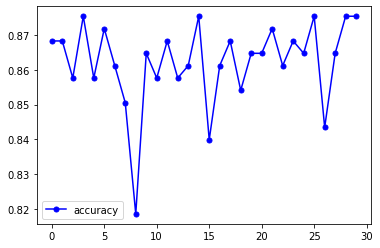

In [25]:
x_len = np.arange(len(accuracy))
#plt.figure(figsize=(12,8))
plt.plot(x_len, accuracy, 'bo-', markersize=5, label='accuracy')
#plt.plot(x_len, val_loss, 'bo-', markersize=5, label='val_loss')
plt.legend()
plt.show()

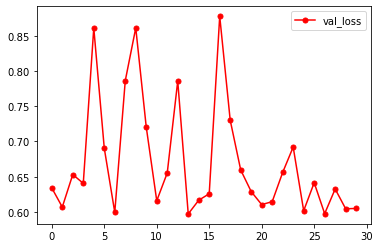

In [26]:
plt.plot(x_len, val_loss, 'ro-', markersize=5, label='val_loss')
plt.legend()
plt.show()